In [21]:
from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser
import os

CLIENT_SECRETS_FILE = "client_secret.json"
SCOPES = ['https://www.googleapis.com/auth/youtube.force-ssl']
API_SERVICE_NAME = 'youtube'
API_VERSION = 'v3'

import google.oauth2.credentials

from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from google_auth_oauthlib.flow import InstalledAppFlow

def get_authenticated_service():
    flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
    credentials = flow.run_console()
    return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)


if __name__ == '__main__':
    # When running locally, disable OAuthlib's HTTPs verification. When
    # running in production *do not* leave this option enabled.
    os.environ['OAUTHLIB_INSECURE_TRANSPORT'] = '1'
    service = get_authenticated_service()


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=367486983057-j76j2a9kggrigt9tr4t03v8079ejbq6a.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=ytbpPKRe46OCxLkw5fcxXIvbmv6XYA&access_type=offline&prompt=consent
Enter the authorization code: 4/SgFVkR5Uwf-JbojnkgLI-I3U8QNUD7jpANg-uQnrklwcKkEVRPebTqw


In [28]:
keyword = "michael j fox"

def get_videos(service, **kwargs):
    final_results = []
    results = service.search().list(**kwargs).execute()
 
    i = 0
    max_pages = 3
    while results and i < max_pages:
        final_results.extend(results['items'])
 
        # Check if another page exists
        if 'nextPageToken' in results:
            kwargs['pageToken'] = results['nextPageToken']
            results = service.search().list(**kwargs).execute()
            i += 1
        else:
            break
 
    return final_results
def search_videos_by_keyword(service, **kwargs):
    results = get_videos(service, **kwargs)
    for item in results:
        print('%s - %s' % (item['snippet']['title'], item['id']['videoId']))

search_videos_by_keyword(service, q=keyword, part='id,snippet', eventType='completed', type='video', order = 'relevance')


The Michael J. Fox Foundation Hangout with Michael J. Fox - IH-1-00cQok
It&#39;s Thursday Night Live Trivia! Name All The Michael J Fox Movies! - T-jK9Opu3I8
Korbane And Anthony James VS. Michael J Fox - L5iBLrQwyZI
Joe Rogan Experience #990 - Jamie Foxx - A_7RmheFRz0
to michael j fox hang out - VTRuMIh20jI
RFC Hershy Design Pro Series | Michael J. Fox Foundation 125 | Iowa | K&amp;N - pB-s_n2hDHc
The Tonight Show Starring Jimmy Fallon - Emma Stone; Tracy Pollan; Michael J. Fox; Tank and the Ban - etNP9FvTGxo
Back to the Future cast Q&amp;A - ZnUBi6nqu3A
Michael J. Behe Interview - Darwin Devolves - GzdCmsGo4iU
Joe Rogan Experience #1153 - Macaulay Culkin - Oyb1xz7waY8
Michael Knowles at UMKC: &quot;Men Are Not Women&quot; - zWYliHNTXiw
LIVE VIDEO: Mega Millions $273M winner tells his story - d6j7xIca0yk
BACK TO THE FUTURE MATCH: Rundown Schmoedown II - QNK6xWhmPB0
Towards a Better Understanding of Parkinson’s Disease: The Use of Novel Technologies &amp; Big Data - kelZgX7tXSw
Real yt 

In [4]:
#download .m4a audio file from youtube link

import youtube_dl

options = {
  'format': 'bestaudio/best',
  'extractaudio' : True,  # only keep the audio
  'audioformat' : "m4a",  # convert to mp3 
  'outtmpl': '%(id)s.m4a',    # name the file the ID of the video
  'noplaylist' : True,    # only download single song, not playlist
}

with youtube_dl.YoutubeDL(options) as ydl:
    ydl.download(['https://www.youtube.com/watch?v=3XoIDGs11kE'])

#convert .m4a to .wav file using ffmpeg
#ffmpeg -i 5OLzuUVfoJ8.m4a 5OLzuUVfoJ8.wav
#need way to automate this by calling cmd line with the above script


[youtube] 3XoIDGs11kE: Downloading webpage
[youtube] 3XoIDGs11kE: Downloading video info webpage
[youtube] Downloading just video 3XoIDGs11kE because of --no-playlist
[download] Destination: 3XoIDGs11kE.m4a
[download] 100% of 4.58MiB in 00:0054MiB/s ETA 00:007


In [6]:
#30 sec to 3 min with 10 seconds each 
#call cmd line to run ffmpeg process
# will save off wav files for 10 sec of audio for duration of clip
import os
import subprocess
os.chdir('/Users/bryanmckinney/desktop/git/parkinsons/')
file = '3XoIDGs11kE'
for sec in range(10,18):
    os.popen("ffmpeg -i "+str(file)+".m4a -ss "+str(10*sec)+" -to "+str((sec*10)+10)+" -ac 1 Letterman/" +str(file)+str(sec)+".wav")
#for sec in range(5,13):
#    os.popen("ffmpeg -i "+str(file)+".m4a -ss "+str(10*sec)+" -to "+str((sec*10)+10)+" -ac 1 MJF/" +str(file)+str(sec)+".wav")

    

In [40]:
#viewing full spectrogram of .wav file
import numpy as np
import matplotlib.pyplot as plt
import librosa

import librosa.display

y, sr = librosa.load('Vnlj-NyiP-Y.wav')

# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y), duration = 60)

idx = slice(*librosa.time_to_frames([30, 35], sr=sr))
plt.figure(figsize=(3, 5))#6,8
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

TypeError: magphase() got an unexpected keyword argument 'duration'

In [8]:
#filter out background noise to 'clean' the audio file to have just voices
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

# The output of the filter shouldn't be greater than the input
# if we assume signals are additive.  Taking the pointwise minimium
# with the input spectrum forces this.
S_filter = np.minimum(S_full, S_filter)
# We can also use a margin to reduce bleed between the vocals and instrumentation masks.
# Note: the margins need not be equal for foreground and background separation
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)

# Once we have the masks, simply multiply them with the input spectrum
# to separate the components

S_foreground = mask_v * S_full
S_background = mask_i * S_full


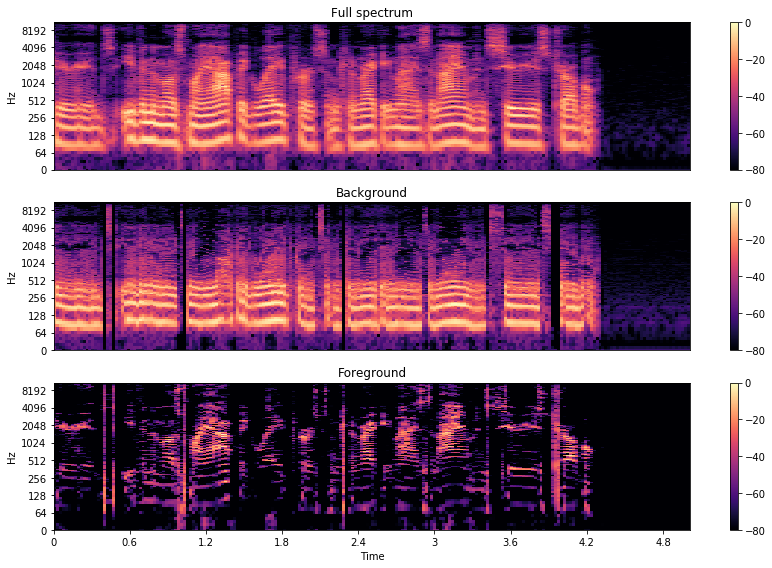

In [4]:

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Full spectrum')
plt.colorbar()

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Background')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.title('Foreground')
plt.colorbar()
plt.tight_layout()
plt.show()

In [9]:
#write out wav file of just foregroud of recording
D_foreground = S_full * phase
y_foreground = librosa.istft(D_foreground)
librosa.output.write_wav('Vnlj-NyiP-Yforeground.wav', y_foreground, sr)




In [ ]:
#Next Steps, find way to idetentify who is speaking and when, so I can extract just that bit 
#of audio to use as analysis
#Could potentially use nueral net to automatically detect who is speaking?


In [37]:
from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser

DEVELOPER_KEY = "BLANK"
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"




def youtube_search(q, max_results=50,order="relevance", token=None, location=None, location_radius=None):

  youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,
    developerKey=DEVELOPER_KEY)

  search_response = youtube.search().list(
    q=q,
    type="video",
    pageToken=token,
    order = order,
    part="id,snippet",
    maxResults=max_results,
    location=location,
    locationRadius=location_radius

  ).execute()



  videos = []

  for search_result in search_response.get("items", []):
    if search_result["id"]["kind"] == "youtube#video":
      videos.append(search_result)
  try:
      nexttok = search_response["nextPageToken"]
      return(nexttok, videos)
  except Exception as e:
      nexttok = "last_page"
      return(nexttok, videos)


def geo_query(video_id):
    youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,
                    developerKey=DEVELOPER_KEY)

    video_response = youtube.videos().list(
        id=video_id,
        part='snippet, recordingDetails, statistics'

    ).execute()

    return video_response

import json
test = youtube_search("michael j fox")
test

('CDIQAA',
 [{'etag': '"XpPGQXPnxQJhLgs6enD_n8JR4Qk/kWHWHwByje7sB4--anjUZCUAtqk"',
   'id': {'kind': 'youtube#video', 'videoId': 'fmkZAV4bjvE'},
   'kind': 'youtube#searchResult',
   'snippet': {'channelId': 'UC8-Th83bH_thdKZDJCrn88g',
    'channelTitle': 'The Tonight Show Starring Jimmy Fallon',
    'description': "Tracy Pollan and Michael J. Fox discuss the key to their 30-year-long marriage after meeting on Family Ties, raising $800 million for Parkinson's research and ...",
    'liveBroadcastContent': 'none',
    'publishedAt': '2019-04-12T11:30:01.000Z',
    'thumbnails': {'default': {'height': 90,
      'url': 'https://i.ytimg.com/vi/fmkZAV4bjvE/default.jpg',
      'width': 120},
     'high': {'height': 360,
      'url': 'https://i.ytimg.com/vi/fmkZAV4bjvE/hqdefault.jpg',
      'width': 480},
     'medium': {'height': 180,
      'url': 'https://i.ytimg.com/vi/fmkZAV4bjvE/mqdefault.jpg',
      'width': 320}},
    'title': 'Tracy Pollan and Michael J. Fox Reveal Their Secret to a L

In [39]:
from google.cloud import speech_v1p1beta1 as speech
client = speech.SpeechClient()

speech_file = '5OLzuUVfoJ8.wav'

with open(speech_file, 'rb') as audio_file:
    content = audio_file.read()

audio = speech.types.RecognitionAudio(content=content)

config = speech.types.RecognitionConfig(
    encoding=speech.enums.RecognitionConfig.AudioEncoding.LINEAR16,
    sample_rate_hertz=8000,
    language_code='en-US',
    enable_speaker_diarization=True,
    diarization_speaker_count=2)

print('Waiting for operation to complete...')
response = client.recognize(config, audio)

# The transcript within each result is separate and sequential per result.
# However, the words list within an alternative includes all the words
# from all the results thus far. Thus, to get all the words with speaker
# tags, you only have to take the words list from the last result:
result = response.results[-1]

words_info = result.alternatives[0].words

# Printing out the output:
for word_info in words_info:
    print("word: '{}', speaker_tag: {}".format(word_info.word,
                                               word_info.speaker_tag))

ImportError: No module named 'google.cloud'